<a href="https://colab.research.google.com/github/brunoalvoliv/analise-de-empresa/blob/main/carteira_invest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bibliotecas

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 14.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
plt.style.use('ggplot')

##Retorno do ibovespa versus carteira

In [4]:
#Buscando os dados 

tickers = ['PETR3.SA', 'MGLU3.SA', 'ITSA4.SA', 'RDOR3.SA', 'LCAM3.SA', 'BPAC11.SA',
           'CSAN3.SA', 'SMFT3.SA', 'ARZZ3.SA', 'TRPL3.SA', 'B3SA3.SA', 'WEGE3.SA', '^BVSP']

carteira1 = pd.DataFrame()

for i in tickers:
  carteira1[i] = yf.download(i, start='2021-11-01', end='2021-11-30')['Adj Close']

carteira1.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PETR3.SA,MGLU3.SA,ITSA4.SA,RDOR3.SA,LCAM3.SA,BPAC11.SA,CSAN3.SA,SMFT3.SA,ARZZ3.SA,TRPL3.SA,B3SA3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,
2021-11-23,25.653015,8.60,9.737445,53.830002,23.930000,20.100000,21.270000,21.059999,70.492790,31.510000,11.98,34.160000,103663.0
2021-11-24,26.153040,8.82,9.891409,52.150002,23.620001,20.600000,21.209999,20.629999,70.720924,31.500000,12.19,33.529999,104514.0
2021-11-25,27.233448,8.70,9.980969,52.000000,24.370001,21.840000,21.520000,21.280001,71.226784,31.410000,12.37,33.799999,105811.0
2021-11-26,26.045891,8.06,9.781947,50.790001,23.580000,20.820000,21.299999,19.450001,68.578468,31.430000,11.78,32.689999,102224.0
2021-11-29,26.929861,8.04,9.771996,51.250000,23.540001,21.540001,21.480000,18.870001,67.646103,31.299999,11.50,32.410000,102814.0


In [5]:
#Obtendo retorno simples

ret_simples = carteira1.pct_change()
ret_simples.fillna(0, inplace=True)
ret_simples.head()

,PETR3.SA,MGLU3.SA,ITSA4.SA,RDOR3.SA,LCAM3.SA,BPAC11.SA,CSAN3.SA,SMFT3.SA,ARZZ3.SA,TRPL3.SA,B3SA3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,
2021-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-03,-0.042509,0.022124,0.008563,0.056111,0.064468,0.009750,0.018326,0.009611,0.053282,0.036489,0.001669,0.019481,0.000625
2021-11-04,-0.029476,-0.040693,-0.033019,-0.081701,0.001408,-0.018052,-0.016051,-0.001428,-0.005746,-0.022115,-0.005000,0.001062,-0.020877
2021-11-05,0.000750,0.122744,-0.007805,0.006992,0.038443,0.044891,0.027187,-0.012393,-0.005276,-0.035229,0.036013,-0.001060,0.013654
2021-11-08,0.016486,-0.040997,-0.001967,0.006770,-0.019413,-0.025368,-0.006737,-0.019788,-0.033847,0.011055,-0.010509,-0.015393,-0.000410


In [6]:
#Obtendo o retorno acumulado e normalizando a base de dados

ret_acum = (1 + ret_simples).cumprod()
ret_acum.head()

,PETR3.SA,MGLU3.SA,ITSA4.SA,RDOR3.SA,LCAM3.SA,BPAC11.SA,CSAN3.SA,SMFT3.SA,ARZZ3.SA,TRPL3.SA,B3SA3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,
2021-11-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-11-03,0.957491,1.022124,1.008563,1.056111,1.064468,1.009750,1.018326,1.009611,1.053282,1.036489,1.001669,1.019481,1.000625
2021-11-04,0.929268,0.980531,0.975262,0.969825,1.065967,0.991522,1.001981,1.008169,1.047231,1.013568,0.996661,1.020563,0.979735
2021-11-05,0.929965,1.100885,0.967650,0.976606,1.106946,1.036032,1.029222,0.995675,1.041705,0.977860,1.032554,1.019481,0.993112
2021-11-08,0.945296,1.055752,0.965747,0.983217,1.085457,1.009750,1.022288,0.975973,1.006446,0.988671,1.021703,1.003788,0.992705


In [7]:
ret_simples.shape

(19, 13)

In [8]:
#Calculando a média diária do retorno simples

mean_retsimples = ret_simples.mean(axis=1)
mean_retsimples = pd.DataFrame(mean_retsimples.head())
mean_retsimples.rename(columns={0:'Carteira'}, inplace=True)
mean_retsimples['Mercado'] = ret_simples['^BVSP']
mean_retsimples.tail()

,Carteira,Mercado
Date,,
2021-11-01,0.000000,0.000000
2021-11-03,0.019845,0.000625
2021-11-04,-0.020899,-0.020877
2021-11-05,0.017609,0.013654
2021-11-08,-0.010778,-0.000410


In [24]:
mean_retsimples.mean()

Carteira    0.001155
Mercado    -0.001402
dtype: float64

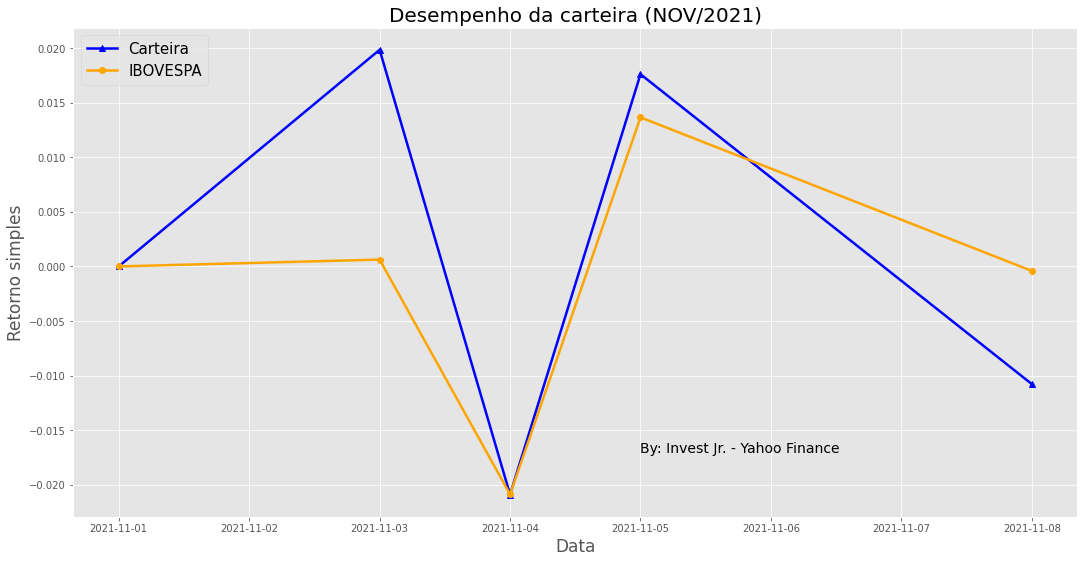

In [9]:
#Visualização da média diária do retorno simples

plt.figure(figsize=(18, 9));
plt.title('Desempenho da carteira (NOV/2021)', fontsize=20);
x, = plt.plot(mean_retsimples.Carteira, marker='^', color='blue', linewidth=2.5, label='Carteira');
y, = plt.plot(mean_retsimples.Mercado, marker='o', color='orange', linewidth=2.5, label='IBOVESPA');
plt.xlabel('Data', fontsize=17);
plt.ylabel('Retorno simples', fontsize=17);
plt.text(np.datetime64('2021-11-05'), -0.017, 'By: Invest Jr. - Yahoo Finance', fontsize=14);
plt.legend(fontsize=15, loc=2);

In [10]:
#Calculando a média diária do retorno acumulado

mean_retacum = ret_acum.mean(axis=1)
mean_retacum  = pd.DataFrame(mean_retacum.head())
mean_retacum.rename(columns={0:'Carteira'}, inplace=True)
mean_retacum['Mercado'] = ret_acum['^BVSP']
mean_retacum.tail()

,Carteira,Mercado
Date,,
2021-11-01,1.000000,1.000000
2021-11-03,1.019845,1.000625
2021-11-04,0.998483,0.979735
2021-11-05,1.015977,0.993112
2021-11-08,1.004369,0.992705


In [25]:
mean_retacum.mean()

Carteira    1.007735
Mercado     0.993235
dtype: float64

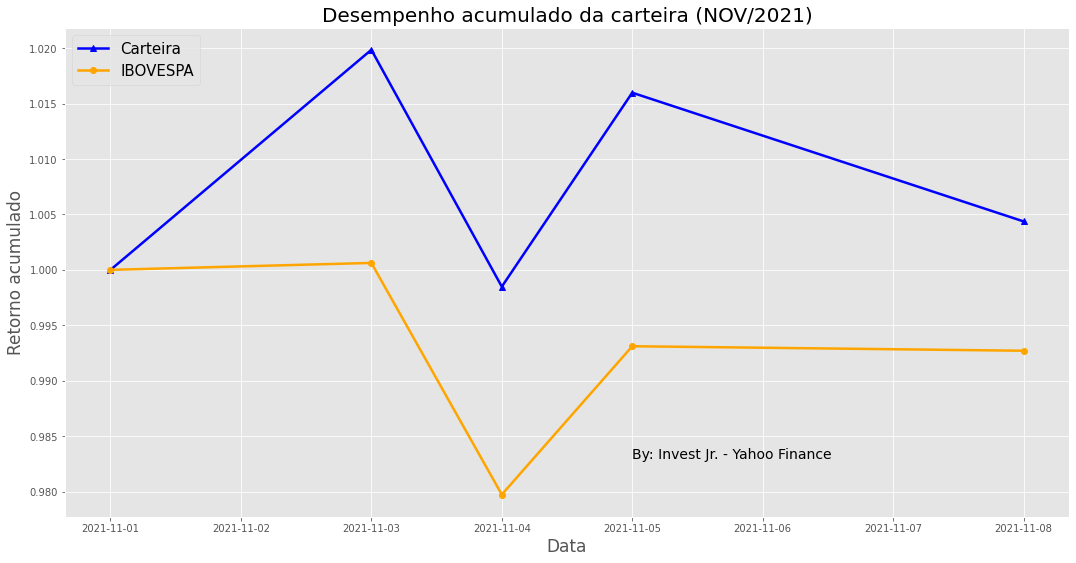

In [11]:
#Visualização da média diária do retorno acumulado

plt.figure(figsize=(18, 9));
plt.title('Desempenho acumulado da carteira (NOV/2021)', fontsize=20);
x, = plt.plot(mean_retacum.Carteira, marker='^', color='blue', linewidth=2.5, label='Carteira');
y, = plt.plot(mean_retacum.Mercado, marker='o', color='orange', linewidth=2.5, label='IBOVESPA');
plt.xlabel('Data', fontsize=17);
plt.ylabel('Retorno acumulado', fontsize=17);
plt.text(np.datetime64('2021-11-05'), 0.983, 'By: Invest Jr. - Yahoo Finance', fontsize=14);
plt.legend(fontsize=15, loc=2);

Criando a tabela de desempenho

In [12]:
preco_inicial = np.round(carteira1.iloc[:1, :12].values.T, 2)

preco_inicio = []

for i in preco_inicial:
  preco_inicio.append(f'R$ {str(i[0])}')

preco_inicio

['R$ 25.63',
 'R$ 11.3',
 'R$ 10.3',
 'R$ 58.99',
 'R$ 20.01',
 'R$ 23.59',
 'R$ 20.19',
 'R$ 20.81',
 'R$ 75.39',
 'R$ 30.53',
 'R$ 11.98',
 'R$ 36.96']

In [13]:
preco_final = np.round(carteira1.iloc[-1:, :12].values.T, 2)

preco_fim = []

for i in preco_final:
  preco_fim.append(f'R$ {i[0]}')

preco_fim

['R$ 26.93',
 'R$ 8.04',
 'R$ 9.77',
 'R$ 51.25',
 'R$ 23.54',
 'R$ 21.54',
 'R$ 21.48',
 'R$ 18.87',
 'R$ 67.65',
 'R$ 31.3',
 'R$ 11.5',
 'R$ 32.41']

In [14]:
#1º passo: obter o retorno simples da carteira

ret_simples.head().iloc[1:, :12]

,PETR3.SA,MGLU3.SA,ITSA4.SA,RDOR3.SA,LCAM3.SA,BPAC11.SA,CSAN3.SA,SMFT3.SA,ARZZ3.SA,TRPL3.SA,B3SA3.SA,WEGE3.SA
Date,,,,,,,,,,,,
2021-11-03,-0.042509,0.022124,0.008563,0.056111,0.064468,0.009750,0.018326,0.009611,0.053282,0.036489,0.001669,0.019481
2021-11-04,-0.029476,-0.040693,-0.033019,-0.081701,0.001408,-0.018052,-0.016051,-0.001428,-0.005746,-0.022115,-0.005000,0.001062
2021-11-05,0.000750,0.122744,-0.007805,0.006992,0.038443,0.044891,0.027187,-0.012393,-0.005276,-0.035229,0.036013,-0.001060
2021-11-08,0.016486,-0.040997,-0.001967,0.006770,-0.019413,-0.025368,-0.006737,-0.019788,-0.033847,0.011055,-0.010509,-0.015393


In [15]:
#2º passo: calcular a média dos retornos esperados

#mean_carteira = np.round(np.mean(retorno_carteira.iloc[1:, :12]) * 100, 2)
mean_carteira = ret_simples.iloc[1:, :12].mean()
mean_carteira

PETR3.SA     0.003089
MGLU3.SA    -0.016153
ITSA4.SA    -0.002812
RDOR3.SA    -0.007396
LCAM3.SA     0.009468
BPAC11.SA   -0.004404
CSAN3.SA     0.003599
SMFT3.SA    -0.004707
ARZZ3.SA    -0.005504
TRPL3.SA     0.002099
B3SA3.SA    -0.002017
WEGE3.SA    -0.007174
dtype: float64

In [16]:
#3º passo: calcular a covariância da carteira

cov_carteira = ret_simples.head().iloc[1:, :12].cov()
cov_carteira

,PETR3.SA,MGLU3.SA,ITSA4.SA,RDOR3.SA,LCAM3.SA,BPAC11.SA,CSAN3.SA,SMFT3.SA,ARZZ3.SA,TRPL3.SA,B3SA3.SA,WEGE3.SA
PETR3.SA,0.000733,0.000180,0.000034,-0.000007,-0.000637,-0.000038,-0.000029,-0.000343,-0.000847,-0.000293,0.000078,-0.000353
MGLU3.SA,0.000180,0.005965,0.000399,0.001778,0.001847,0.002441,0.001438,-0.000020,0.000673,-0.000972,0.001580,0.000275
ITSA4.SA,0.000034,0.000399,0.000312,0.001003,0.000323,0.000158,0.000227,0.000020,0.000275,0.000404,0.000036,0.000068
RDOR3.SA,-0.000007,0.001778,0.001003,0.003294,0.001297,0.000732,0.000850,0.000121,0.001073,0.001218,0.000249,0.000302
LCAM3.SA,-0.000637,0.001847,0.000323,0.001297,0.001404,0.000861,0.000617,0.000345,0.001234,0.000320,0.000406,0.000476
BPAC11.SA,-0.000038,0.002441,0.000158,0.000732,0.000861,0.001016,0.000599,0.000044,0.000407,-0.000360,0.000643,0.000167
CSAN3.SA,-0.000029,0.001438,0.000227,0.000850,0.000617,0.000599,0.000416,0.000044,0.000368,0.000016,0.000345,0.000131
SMFT3.SA,-0.000343,-0.000020,0.000020,0.000121,0.000345,0.000044,0.000044,0.000165,0.000435,0.000180,-0.000027,0.000176
ARZZ3.SA,-0.000847,0.000673,0.000275,0.001073,0.001234,0.000407,0.000368,0.000435,0.001343,0.000635,0.000079,0.000517
TRPL3.SA,-0.000293,-0.000972,0.000404,0.001218,0.000320,-0.000360,0.000016,0.000180,0.000635,0.001053,-0.000386,0.000188


In [17]:
#4º passo: definir os pesos

pesos_carteira = np.array([0.091, 0.054, 0.073, 0.058, 0.077, 0.042, 0.098, 0.056, 
                           0.053, 0.205, 0.036, 0.156])
pesos_carteira = np.round(pesos_carteira * 100, 2)

composicao = []

for i in pesos_carteira:
  composicao.append(f'{i}%')

composicao

['9.1%',
 '5.4%',
 '7.3%',
 '5.8%',
 '7.7%',
 '4.2%',
 '9.8%',
 '5.6%',
 '5.3%',
 '20.5%',
 '3.6%',
 '15.6%']

In [18]:
#5º passo: retornos individuais

retornos_individuais = (pesos_carteira * mean_carteira) * 100
retornos_individuais = np.round(retornos_individuais, 2)

retornos_individual = []

for i in retornos_individuais:
  retornos_individual.append(f'{i}%')

retornos_individual

['2.81%',
 '-8.72%',
 '-2.05%',
 '-4.29%',
 '7.29%',
 '-1.85%',
 '3.53%',
 '-2.64%',
 '-2.92%',
 '4.3%',
 '-0.73%',
 '-11.19%']

In [19]:
#6º passo: retorno da carteira

retorno_carteira = np.sum(pesos_carteira * mean_carteira)
retorno_carteira

-0.16452386911663322

In [20]:
#7º risco da carteira

risco_carteira = np.sqrt(np.dot(pesos_carteira.T, np.dot(cov_carteira, pesos_carteira)))
risco_carteira

1.7915567971199733

In [21]:
ret_simples_mean = np.round(ret_simples.iloc[:, :12].head().mean() * 100, 2)

ret_ativo = []

for i in ret_simples_mean:
  ret_ativo.append(f'{i}%')

ret_ativo

['-1.09%',
 '1.26%',
 '-0.68%',
 '-0.24%',
 '1.7%',
 '0.22%',
 '0.45%',
 '-0.48%',
 '0.17%',
 '-0.2%',
 '0.44%',
 '0.08%']

In [22]:
#Tabela de desempenho

desempenho = pd.DataFrame(index=tickers[:12])
desempenho['Composição'] = composicao
desempenho['Preço Inicial'] = preco_inicio
desempenho['Preço Final'] = preco_fim
desempenho['Retorno do Ativo'] = ret_ativo
desempenho['Retorno na Carteira'] = retornos_individual

desempenho

,Composição,Preço Inicial,Preço Final,Retorno do Ativo,Retorno na Carteira
PETR3.SA,9.1%,R$ 25.63,R$ 26.93,-1.09%,2.81%
MGLU3.SA,5.4%,R$ 11.3,R$ 8.04,1.26%,-8.72%
ITSA4.SA,7.3%,R$ 10.3,R$ 9.77,-0.68%,-2.05%
RDOR3.SA,5.8%,R$ 58.99,R$ 51.25,-0.24%,-4.29%
LCAM3.SA,7.7%,R$ 20.01,R$ 23.54,1.7%,7.29%
BPAC11.SA,4.2%,R$ 23.59,R$ 21.54,0.22%,-1.85%
CSAN3.SA,9.8%,R$ 20.19,R$ 21.48,0.45%,3.53%
SMFT3.SA,5.6%,R$ 20.81,R$ 18.87,-0.48%,-2.64%
ARZZ3.SA,5.3%,R$ 75.39,R$ 67.65,0.17%,-2.92%
TRPL3.SA,20.5%,R$ 30.53,R$ 31.3,-0.2%,4.3%


In [23]:
#desempenho.to_csv('desempenho_invest.csv', sep=',');